## Figure 5. Regulatory potential of the apical loop structure.
- 5A. Distribution of the apical loop size.
- 5B. In vitro processing results of pri-miRNAs binned by the apical loop size.

In [11]:
import time
today = time.strftime('%Y-%m-%d')
name = 'S. Chan Baek'
print 'Last revised by %s at %s.' % (name, today)

Last revised by S. Chan Baek at 2024-01-26.


In [12]:
import os
HOME = '/casa/bsc/projects/2_Structure-of-pri/2007_paper_prep'
SAVEPATH = '%s/%s/'%(HOME,time.strftime('%y%m%d'))
#if not os.path.exists(SAVEPATH):
#    os.makedirs(SAVEPATH)
print SAVEPATH
%cd $HOME

/casa/bsc/projects/2_Structure-of-pri/2007_paper_prep/240126/
/casa/bsc/projects/2_Structure-of-pri/2007_paper_prep


In [13]:
from __future__ import division
from collections import Counter, defaultdict
from matplotlib import pyplot as plt
from matplotlib import gridspec, lines, colors
from scipy.stats import pearsonr, mannwhitneyu, sem
import pandas as pd
import numpy as np
import re
%matplotlib inline

In [14]:
s1 = pd.read_csv('publication/TableS1__Pri-miRNAs_selected_for_SHAPE-MaP.csv',index_col=0)
s2 = pd.read_csv('publication/TableS2__Constructs_used_in_this_study.csv',index_col=0)
s3 = pd.read_csv('publication/TableS3_2__SHAPE_reactivity.csv',index_col=0)
s3.columns = range(1,126)
s3cnts = pd.read_csv('publication/TableS3_1__Read_counts.csv',index_col=0)
s3shan = pd.read_csv('publication/TableS3_3__Shannon_entropy.csv',index_col=0)
s3shan.columns = range(1,126)
s3shan = s3shan.fillna(0)
s4str = pd.read_csv('publication/TableS4_1__SHAPE-based_pri-miRNA_structures.csv',index_col=0)
s4str.columns = range(1,126)
s4 = pd.read_csv('publication/TableS4_2__Structural_features_of_pri-miRNAs.csv',index_col=0)
releffs = s4['Cleavage efficiency (MP)']
relhoms = s4['Cleavage homogeneity (MP)']
constseqs = s2['Construct sequence'].to_dict()
folded = list(s4.index)
print len(folded)

476


In [15]:
def get_pre_position(mir):
    constseq = constseqs[mir].replace('T','U')
    preseq = s1.loc[mir, 'Precursor']
    return constseq.find(preseq)+1, constseq.find(preseq)+len(preseq)

def split_ct(ctfile):
    infos = open(ctfile, 'rt').read()
    length = int(infos.split('\n')[0].strip().split()[0])
    rna = infos.split('\n')[0].strip().split()[-1]
    nstrt = infos.count(rna)
    splitinfos = []
    for i in range(nstrt):
        lines = infos.split('\n')[1+(1+length)*i:(1+length)*(i+1)]
        splitinfos.append([ tuple(map(int,l.strip().split()[4:6][::-1])) for l in lines ])
    return splitinfos

### 5A. Distribution of the apical loop size

In [16]:
xs = range(3,20)
ys = [s4[s4['Apical loop size (nt)']==x] for x in xs]+[s4[s4['Apical loop size (nt)']>=20]]
ys1 = np.array(map(len,ys))/len(folded)*100

let7s = [m for m in folded if m.startswith('hsa-let')] + ['hsa-mir-98']
sub = s4.reindex(let7s)
ys = [sub[sub['Apical loop size (nt)']==x] for x in xs]+[sub[sub['Apical loop size (nt)']>=20]]
ys2 = np.array(map(len,ys))/len(folded)*100
xs = range(3,21)
print ys1
print ys2

[ 0.21008403  1.05042017  2.31092437  1.8907563   2.5210084   5.25210084
  6.72268908  4.83193277  9.24369748 13.65546218 13.65546218  9.87394958
  9.87394958  3.99159664  4.20168067  2.5210084   1.05042017  7.14285714]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.21008403 0.         2.10084034]


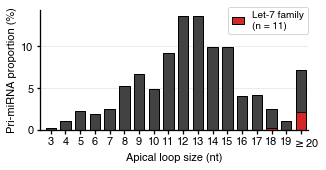

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(4.8,2.2))
ax.bar(xs,ys1,color='#424242',width=.7,edgecolor='k',lw=1,zorder=2)
ax.bar(xs,ys2,color='tab:red',width=.7,edgecolor='k',lw=1,zorder=2,
       label='Let-7 family\n(n = %s)'%len(let7s))
ax.set_xlabel('Apical loop size (nt)')
ax.set_ylabel('Pri-miRNA proportion (%)')
ax.set_xticks(xs)
ax.set_xticklabels(xs[:-1]+['   $\geq$20'])
ax.set_xlim(min(xs)-.7,max(xs)+.5)
ax.yaxis.grid(ls='-',lw=.5)
ax.legend(loc=(.7,.8),handlelength=1.2)
#fig.savefig(resultpath+'220530_f4a__loop_tmp.pdf')

### 5B. In vitro processing results of pri-miRNAs binned by the apical loop size

In [19]:
bins = [(3,7),(8,9),(10,11),(12,12),(13,13),(14,15),(16,50)]
msl = [[m for m in folded if lb<=s4.loc[m,'Apical loop size (nt)']<=ub] for lb,ub in bins]
pes = [[releffs[m] for m in ms] for ms in msl]
phs = [[relhoms[m] for m in ms] for ms in msl]
xs = np.arange(len(bins))
ys1 = map(np.average,pes)
es1 = map(sem,pes)
ys2 = map(np.average,phs)
es2 = map(sem,phs)
labels = ['$\leq$7','8-9','10-11','12','13','14-15','$\geq$16']
for x,pe,ph in zip(labels,pes,phs):
    print '%s %.4f %.4f'%(x,mannwhitneyu(pes[0],pe)[1]*2,mannwhitneyu(phs[0],ph)[1]*2)
labels = ['%s\n(%s)'%(l,len(pe)) for l,pe in zip(labels,pes)]

$\leq$7 0.9958 0.9959
8-9 0.3314 0.3252
10-11 0.1760 0.2064
12 0.0292 0.0062
13 0.0004 0.0012
14-15 0.0005 0.0001
$\geq$16 0.0006 0.0021


Text(0,0.5,u'Cleavage homogeneity')

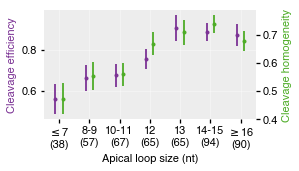

In [20]:
fig,ax = plt.subplots(1,1,figsize=(3.8,2))

ax.errorbar(xs-.12,ys1,yerr=es1,lw=0,elinewidth=1.8,ms=3,marker='o',color='#7b3294')
axt = ax.twinx()
axt.errorbar(xs+.12,ys2,yerr=es2,lw=0,elinewidth=1.8,ms=3,marker='o',color='#4dac26')
ax.set_xlim(min(xs)-.5,max(xs)+.5)
ax.set_xticks(xs)
ax.set_xticklabels(labels)
ax.grid(ls='-',lw=.7,color='w')
for a in [ax,axt]:
    a.spines['left'].set_visible(False)
    a.spines['bottom'].set_visible(False)

axt.tick_params(left='off',right='on')
ax.set_facecolor('#ededed')
ax.set_xlabel('Apical loop size (nt)')
ax.set_ylabel('Cleavage efficiency',color='#7b3294')
axt.set_ylabel('Cleavage homogeneity',color='#4dac26')
#fig.savefig(resultpath + '230713_f4b__loop_processing.pdf')

In [21]:
print mannwhitneyu(pes[0]+pes[1]+pes[2]+pes[3],pes[4]+pes[5]+pes[6])
print mannwhitneyu(phs[0]+phs[1]+phs[2]+phs[3],phs[4]+phs[5]+phs[6])

MannwhitneyuResult(statistic=20955.5, pvalue=5.404387134745742e-07)
MannwhitneyuResult(statistic=21888.0, pvalue=1.0606960734213443e-05)


### S5B

Readings  
https://www.med.upenn.edu/ostaplab/assets/user-content/documents/simpleligandbindingequations.pdf  
https://stackoverflow.com/questions/9990789/how-to-force-zero-interception-in-linear-regression

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
tbl = pd.read_table('publication/LIN28_EMSA/bound_frac.tsv',index_col=0).astype(float)
tbl

,5,10,20,40,80,160
let-7a-3,0.450463,2.054103,6.614215,19.633337,43.155917,78.808397
let-7a-1,2.507302,6.389326,18.948788,40.185612,73.525279,92.833935
let-7f-2,2.964073,8.672878,23.972588,56.398788,83.116107,96.443568
let-7c,8.444568,16.665235,41.099078,75.580445,94.077098,98.357979
let-7e,12.098207,26.484450,56.855483,85.171350,92.478626,94.503620
let-7a-2,14.610069,34.476807,72.840198,91.793545,97.502426,98.429953


In [24]:
xs = 1/np.array([5,10,20,40,80,160])
xs2 = np.array([[x] for x in xs])
kds = {}
for pri in tbl.index:
    ys = 100/(tbl.loc[pri].values)-1
    reg = LinearRegression(fit_intercept=False).fit(xs2[1:],ys[1:])
    print pri, reg.coef_[0]
    kds[pri] = reg.coef_[0]

let-7a-3 420.01515817274145
let-7a-1 129.2142537453002
let-7f-2 92.61706265410429
let-7c 43.59337785187717
let-7e 24.117681599507417
let-7a-2 15.866624459565221


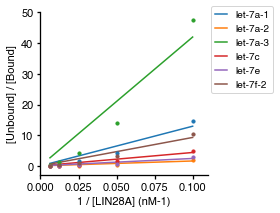

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(3,3))
for pri in sorted(tbl.index):
    ys = 100/(tbl.loc[pri].values)-1
    ax.scatter(xs[1:],ys[1:],s=10,zorder=3)
    ax.plot(xs[1:],kds[pri]*xs[1:],label=pri)
ax.set_xlim(0,.11)
ax.set_xlabel('1 / [LIN28A] (nM-1)')
ax.set_ylabel('[Unbound] / [Bound]')
ax.legend(loc=(1.02,.5),handlelength=1.2)
#fig.savefig('kd calculation.pdf')

In [28]:
efn2 = '/casa/bsc/bin/RNAstructure/exe/efn2'
datapath = '/casa/bsc/bin/RNAstructure/data_tables'
%env DATAPATH $datapath

env: DATAPATH=/casa/bsc/bin/RNAstructure/data_tables


In [29]:
pris = ['hsa-%s'%pri for pri in tbl.index]
for m in pris:
    rts = s3.loc[m].tolist()
    with open('publication/LIN28_EMSA/%s.shape'%m,'wt') as out:
        out.write('\n'.join(['%s\t%s'%(i+1,rt) for i,rt in enumerate(rts)]))
    ctfile = 'publication/structures/SHAPE/%s.ct'%m
    dgfile = 'publication/LIN28_EMSA/%s.delg'%pri
    #res = !$efn2 $ctfile $dgfile -sh $rtfile -w

In [30]:
delgs = {'let-7f-2':.1,
         'let-7a-3':-7.2,
         'let-7a-1':3.6,
         'let-7a-2':6.4,
         'let-7c':6.4,
         'let-7e':5.9}

In [36]:
xs

[-7.2, 3.6, 0.1, 6.4, 5.9, 6.4]

In [37]:
ys

[420.01515817274145,
 129.2142537453002,
 92.61706265410429,
 43.59337785187717,
 24.117681599507417,
 15.866624459565221]

In [39]:
xs = [delgs[m] for m in tbl.index]
xs2 = [[x] for x in xs]
ys = [kds[m] for m in tbl.index]
reg = LinearRegression().fit(xs2,ys)
r, p = pearsonr(xs,ys)
colors = ['#F58345']*3 + ['#2F8475']*3

Text(2,380,u'r = -0.95\np = 0.004')

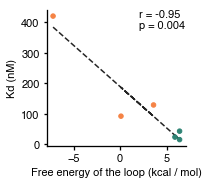

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(2.5,2.5))
ax.scatter(xs,ys,s=20,zorder=3,color=colors)
ax.plot(xs,np.array(xs)*reg.coef_[0]+reg.intercept_,ls='--',color='#242424')

ax.set_xlabel('Free energy of the loop (kcal / mol)')
ax.set_ylabel('Kd (nM)')
ax.text(2,380,'r = %.2f\np = %.3f'%(r,p),fontsize=11)
#fig.savefig('delta G corr.pdf')